In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from matplotlib.animation import FuncAnimation # type: ignore
import seaborn as sns # type: ignore
import pandas as pd

%matplotlib inline

sns.set_style(style='whitegrid')
plt.rcParams["path.force_edgecolor"] = True

KeyError: 'path.force_edgecolor is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

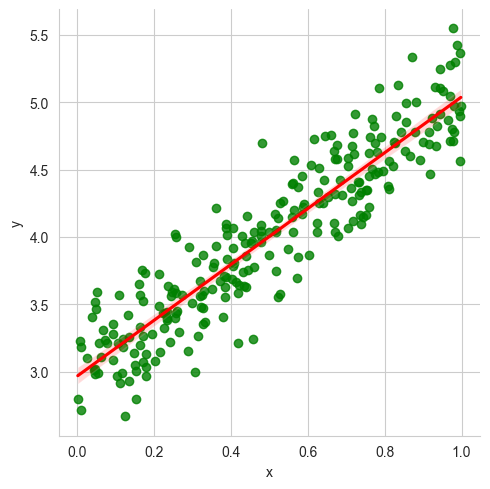

In [51]:
m=2
c=3
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x*m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x='x',y='y',data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'});

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
x_train = x.reshape(-1, 1).astype('float32')
y_train = x.reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
    